In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\kashi\Downloads\cleaned_games.csv")

In [5]:
#app_id is the unique identifier of each game on Steam and allows us to check there are no duplicates
df['AppID'].duplicated().sum()  

0

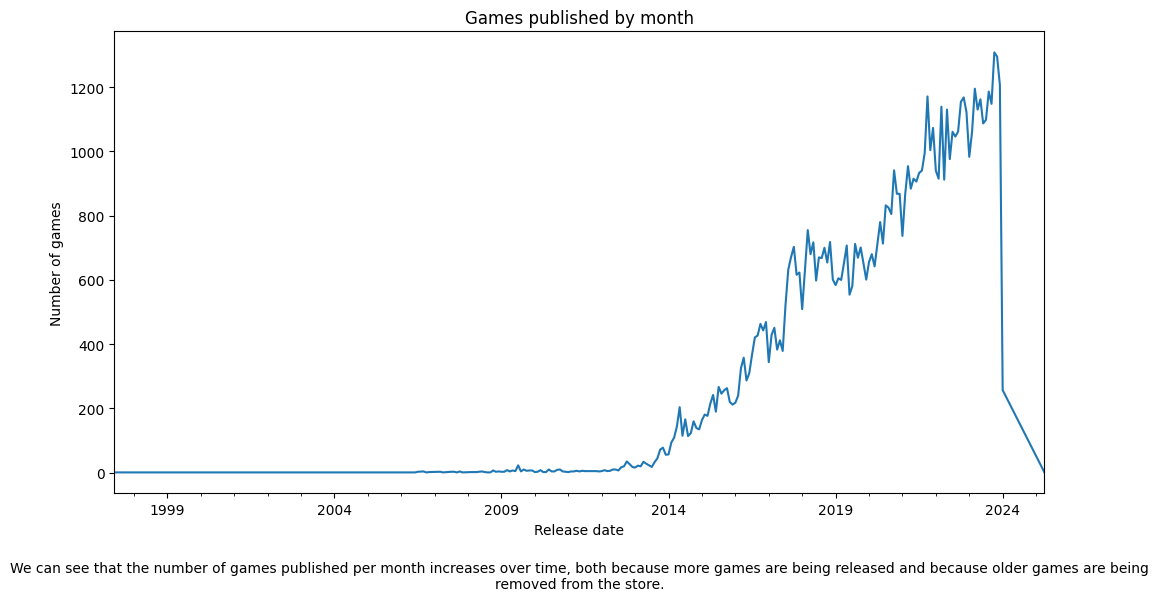

In [14]:
#RELEASE DATE
#converting release dates to date time
df["Release date"]=pd.to_datetime(df["Release date"],errors="coerce") 

plt.figure(figsize=(12, 6))

df_clean = df.dropna(subset=['Release date'])

if not df_clean.empty:
    df_clean.groupby(df_clean['Release date'].dt.to_period('M')).size().plot(kind='line')
    plt.title('Games published by month')
    plt.ylabel('Number of games')
    
    caption = "We can see that the number of games published per month increases over time, both because more games are being released and because older games are being removed from the store."
    plt.text(0.5, -0.2, caption, ha='center', fontsize=10, wrap=True, transform=plt.gca().transAxes)
    
    plt.show()
else:
    print("No data available to plot.")

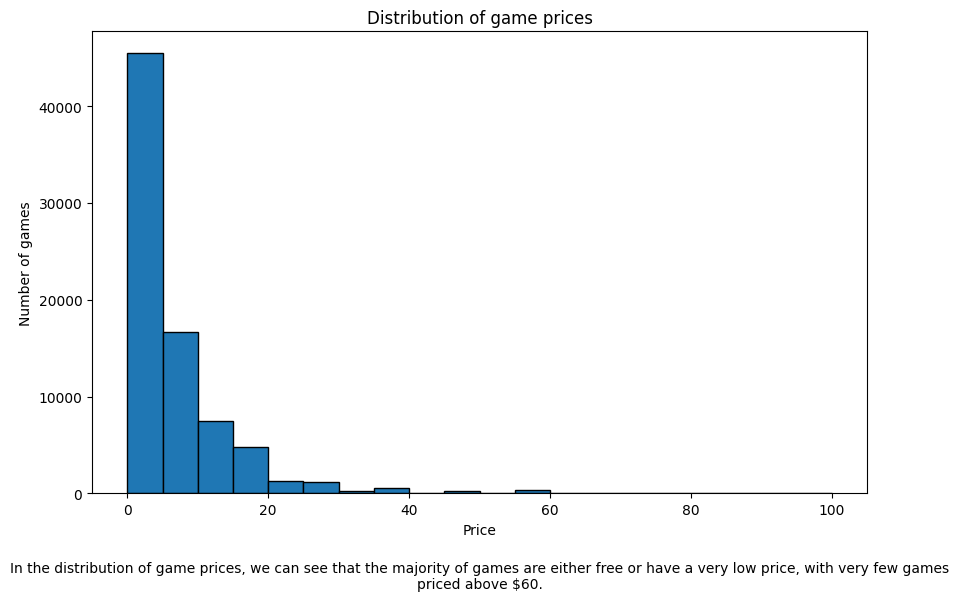

In [16]:
# PRICES
bins = range(0, 105, 5)
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=bins, edgecolor='black')
plt.title('Distribution of game prices')
plt.xlabel('Price')
plt.ylabel('Number of games')
caption = "In the distribution of game prices, we can see that the majority of games are either free or have a very low price, with very few games priced above $60."
plt.text(0.5, -0.2, caption, ha='center', fontsize=10, wrap=True, transform=plt.gca().transAxes)
plt.show()

In [17]:
# Proportion of free games
round(df[df['Price'] == 0].shape[0] / df.shape[0], 2)
#16% of games are free.

0.16

In [18]:
# Maximum price
df['Price'].max()
#The maximum price is almost $1000. Let's see the games with the highest prices:

999.98

In [19]:
# Games with a price over $100
df[df['Price'] > 100]
#We can see that there are only 112 games with a price exceeding $100.

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,OS
1063,1340860,灰烬行星与填鸭少女,2020-08-08,0 - 20000,0,0,199.99,0,高价的意思是这游戏停售；但挂在架上好看 ===Story=== 在河北省，核大战后孤独的世界...,['Simplified Chinese'],...,0,0,世界末日高考组,Dmk,"Single-player,Steam Cloud","Casual,Indie","Casual,Adventure,Visual Novel,Interactive Fict...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,Windows
1906,1720060,Earthquake escape,2021-11-25,0 - 20000,0,0,199.99,0,"This is an earthquake escape game, about how t...","['English', 'Simplified Chinese']",...,0,0,CatCat Gaming,CatCat Gaming,Single-player,Simulation,"Simulation,Education,3D,Tutorial,Singleplayer",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,Windows
3045,865150,安全教育,2018-06-03,0 - 20000,0,0,199.99,0,"Through the series of Colyu safety education, ...",['Simplified Chinese'],...,0,0,Colyu,Colyu,Single-player,Adventure,Adventure,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,Windows
6316,1775390,Substance 3D Painter 2022,2021-11-24,0 - 20000,150,0,149.99,0,Adobe Substance 3D Painter is the reference te...,"['English', 'French', 'German', 'Japanese', 'S...",...,0,0,Adobe,Adobe,NaN,"Animation & Modeling,Game Development","Game Development,Animation & Modeling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"Windows, Mac, Linux"
6508,1828710,Tumble,2021-12-15,0 - 20000,0,0,199.99,0,YOU ARE THE ONLY HOPE Tumble is an action-plat...,['English'],...,0,0,AT_Games,AT_Games,Single-player,"Action,Adventure,Indie","Exploration,2D Platformer,Action,Dungeon Crawl...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78158,2703260,3D PUZZLE - Post-Apocalyptic 3,2023-12-26,0 - 0,0,0,119.99,0,"Collect a 3D puzzle, transferring things to th...","['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,PUZZLE Games,Hede,"Single-player,Steam Achievements,Steam Leaderb...","Action,Adventure,Casual,Indie,Racing,RPG,Simul...","Action,Adventure,Casual,Indie,Racing,RPG,Simul...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"Windows, Mac, Linux"
78236,2703240,Scream or Die - Virtual Circus,2023-12-26,0 - 0,0,0,119.99,0,Horror game. The player needs to get out of th...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Hede,Hede,"Single-player,Steam Achievements,Steam Leaderb...","Action,Adventure,Casual,Indie,Racing,RPG,Simul...","Action,Adventure,Casual,Indie,Racing,RPG,Simul...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"Windows, Mac, Linux"
78264,2703250,3D PUZZLE - Breaking Bed,2023-12-26,0 - 0,0,0,119.99,0,"Collect a 3D puzzle, transferring things to th...","['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,PUZZLE Games,Hede,"Single-player,Steam Achievements,Steam Leaderb...","Action,Adventure,Casual,Indie,Racing,RPG,Simul...","Action,Adventure,Casual,Indie,Racing,RPG,Simul...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"Windows, Mac, Linux"
78362,2703280,Climb Challenge - Find Items Cyberpunk,2024-01-03,0 - 0,0,0,119.99,0,Hidden-object adventure game. The player needs...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Hede,Hede,"Single-player,Steam Achievements,Steam Leaderb...","Action,Adventure,Casual,Indie,Racing,RPG,Simul...","Action,Adventure,Casual,Indie,Racing,RPG,Simul...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,"Windows, Mac, Linux"


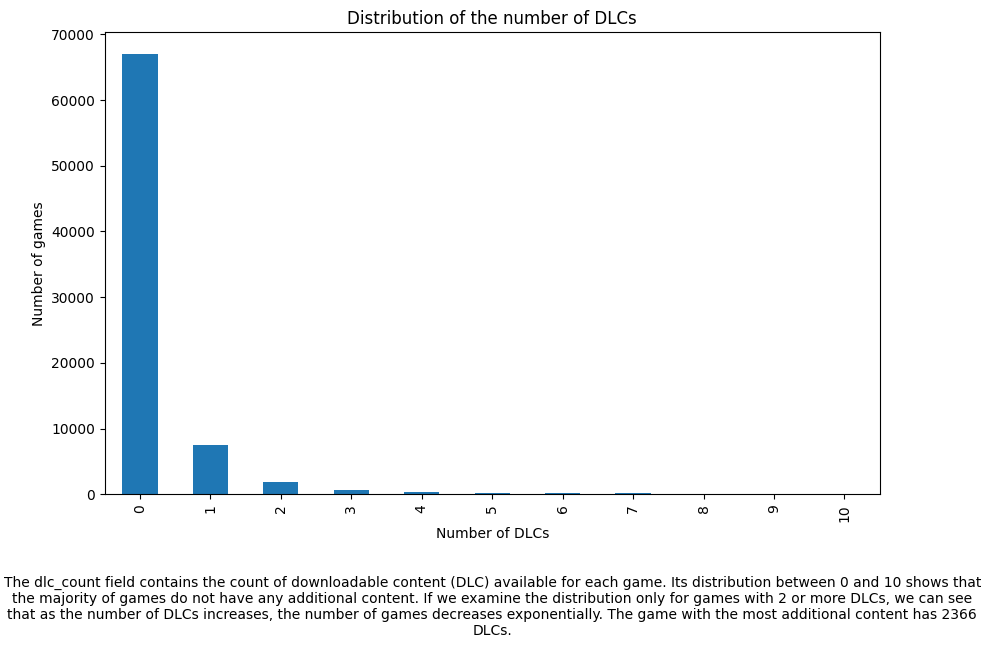

In [21]:
# Number of DLCs (up to 10)
dlc_counts = df['DLC count'].value_counts().sort_index()
dlc_counts = dlc_counts[dlc_counts.index <= 10]
plt.figure(figsize=(10, 6))
dlc_counts.plot(kind='bar')
plt.title('Distribution of the number of DLCs')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
caption = "The dlc_count field contains the count of downloadable content (DLC) available for each game. Its distribution between 0 and 10 shows that the majority of games do not have any additional content. If we examine the distribution only for games with 2 or more DLCs, we can see that as the number of DLCs increases, the number of games decreases exponentially. The game with the most additional content has 2366 DLCs."
plt.text(0.5, -0.3, caption, ha='center', fontsize=10, wrap=True, transform=plt.gca().transAxes)
plt.show()

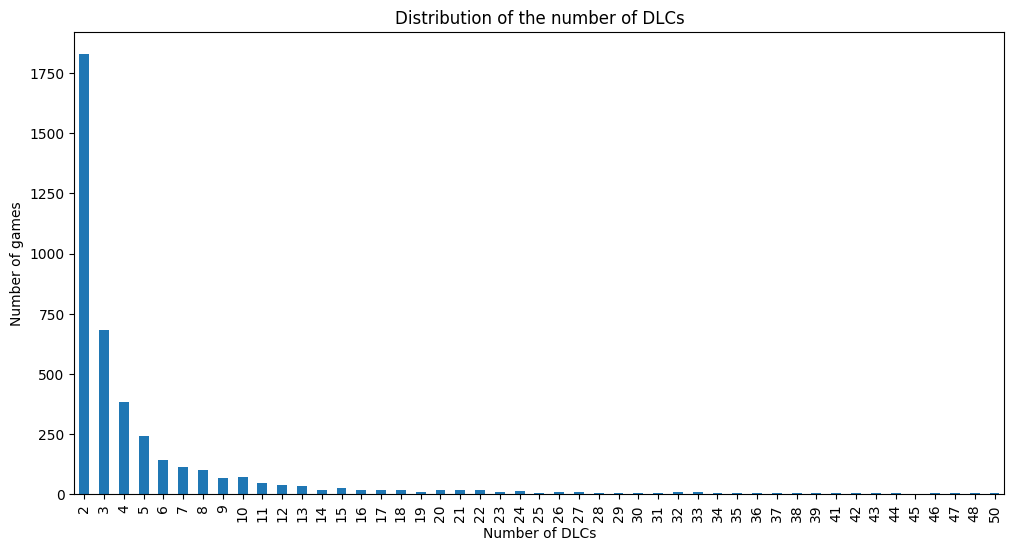

In [22]:
# Distribution of the number of DLCs (2 to 50)
dlc_counts = df['DLC count'].value_counts().sort_index()
dlc_counts = dlc_counts[(dlc_counts.index >= 2) & (dlc_counts.index <= 50)]
plt.figure(figsize=(12, 6))
dlc_counts.plot(kind='bar')
plt.title('Distribution of the number of DLCs')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
plt.show()

In [23]:
# Maximum number of DLCs
df['DLC count'].max()

2366

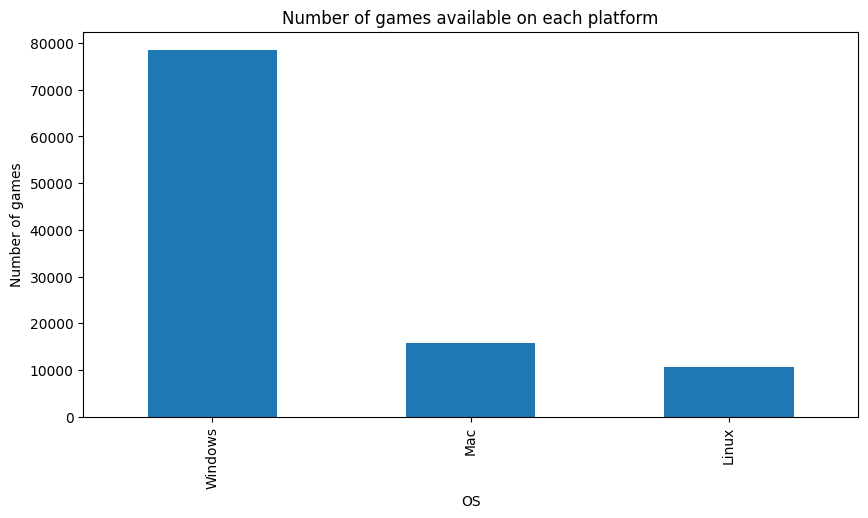

In [27]:
#We can also analyze the proportion of games available for different operating systems, such as Windows, Mac, and Linux:
platform_sums = df[['Windows', 'Mac', 'Linux']].sum()
plt.figure(figsize=(10, 5))
platform_sums.plot(kind='bar')
plt.title('Number of games available on each platform')
plt.xlabel('OS')
plt.ylabel('Number of games')
plt.show()

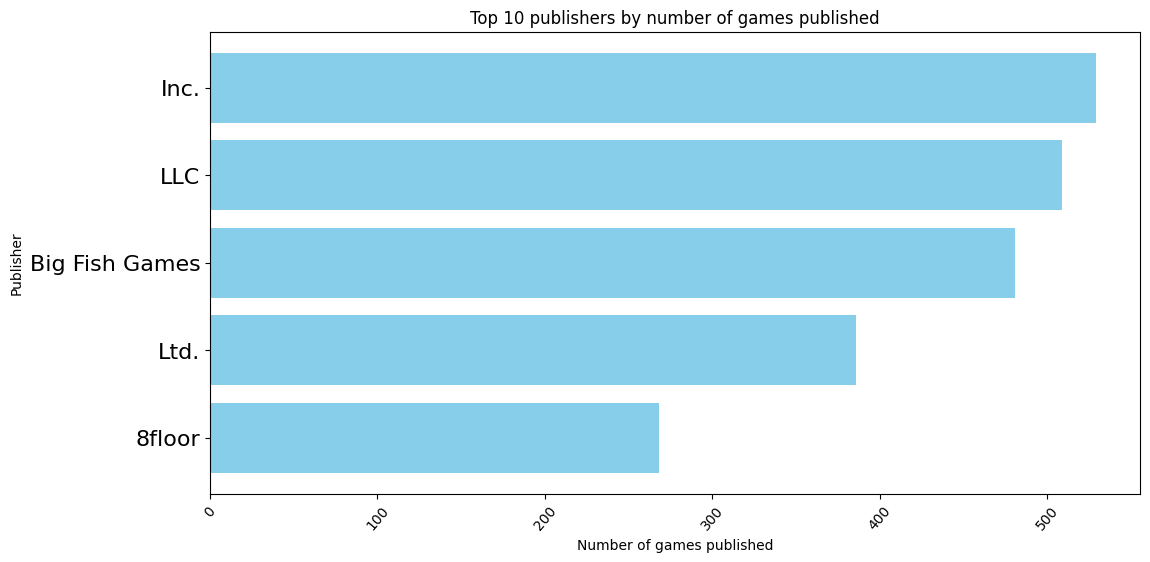

In [29]:
# Publishers (top 10)
all_publishers=[publishers.strip() for sublist in df['Publishers'].dropna() for publishers in sublist.split(',') if sublist]
publisher_counts = Counter(all_publishers)
top_publishers = pd.DataFrame(publisher_counts.most_common(5), columns=['Publisher', 'Games Published'])
plt.figure(figsize=(12, 6))
plt.barh(top_publishers['Publisher'], top_publishers['Games Published'], color='skyblue')
plt.title('Top 10 publishers by number of games published')
plt.ylabel('Publisher')
plt.xlabel('Number of games published')
plt.xticks(rotation=50)
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

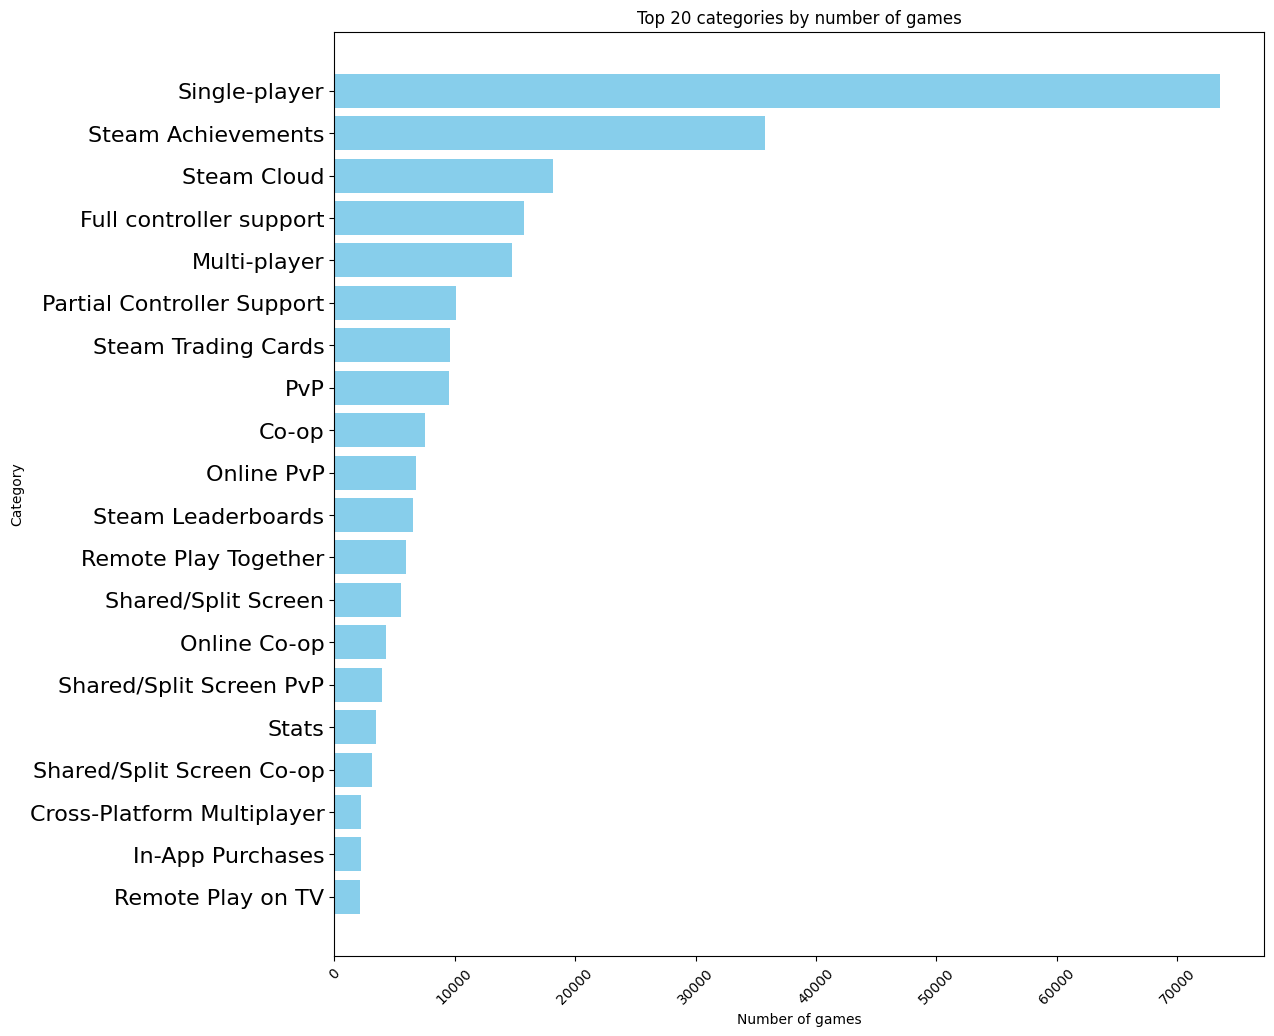

In [34]:
# Categories (top 20)
all_categories = [category.strip() for sublist in df['Categories'].dropna() for category in sublist.split(',') if sublist]
category_counts = Counter(all_categories)
top_categories = pd.DataFrame(category_counts.most_common(20), columns=['Category', 'Games'])
plt.figure(figsize=(12, 12))
plt.barh(top_categories['Category'], top_categories['Games'], color='skyblue')
plt.title('Top 20 categories by number of games')
plt.ylabel('Category')
plt.xlabel('Number of games')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

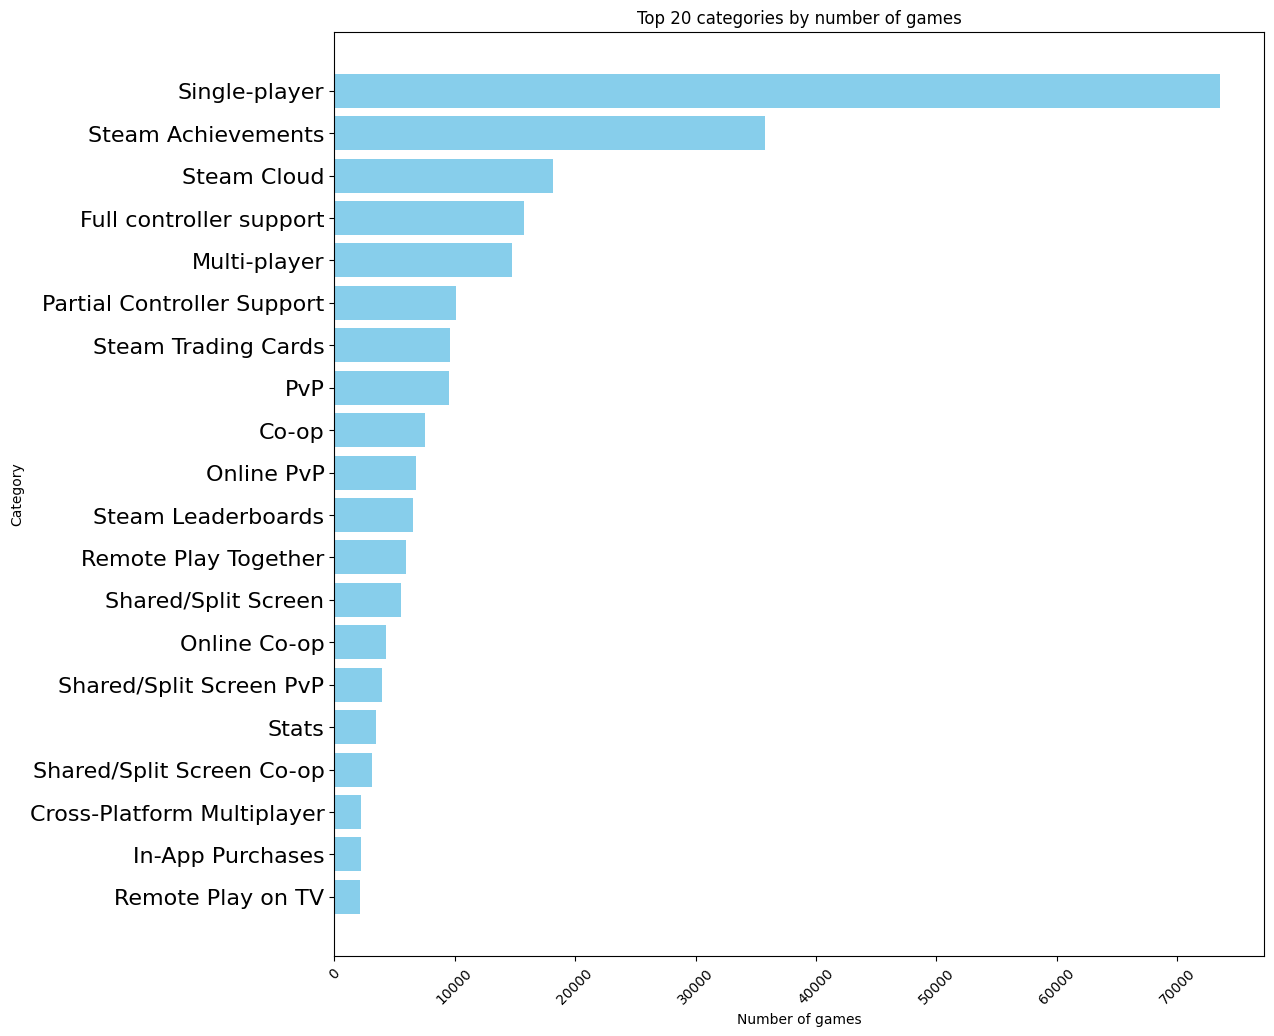

In [35]:
# Categories (top 20)
all_categories = [category.strip() for sublist in df['Categories'].dropna() for category in sublist.split(',') if sublist]
category_counts = Counter(all_categories)
top_categories = pd.DataFrame(category_counts.most_common(20), columns=['Category', 'Games'])
plt.figure(figsize=(12, 12))
plt.barh(top_categories['Category'], top_categories['Games'], color='skyblue')
plt.title('Top 20 categories by number of games')
plt.ylabel('Category')
plt.xlabel('Number of games')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

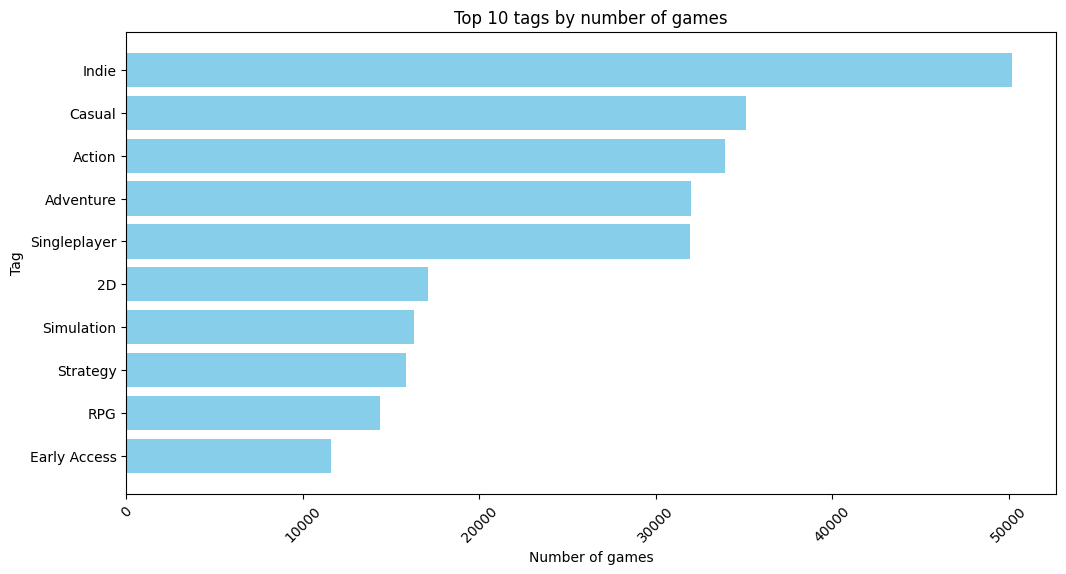

In [36]:
# Tags (top 10)
all_tags = [tag.strip() for sublist in df['Tags'].dropna() for tag in sublist.split(',') if sublist]
tag_counts = Counter(all_tags)
top_tags = pd.DataFrame(tag_counts.most_common(10), columns=['Tag', 'Number of Games'])
plt.figure(figsize=(12, 6))
plt.barh(top_tags['Tag'], top_tags['Number of Games'], color='skyblue')
plt.title('Top 10 tags by number of games')
plt.ylabel('Tag')
plt.xlabel('Number of games')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

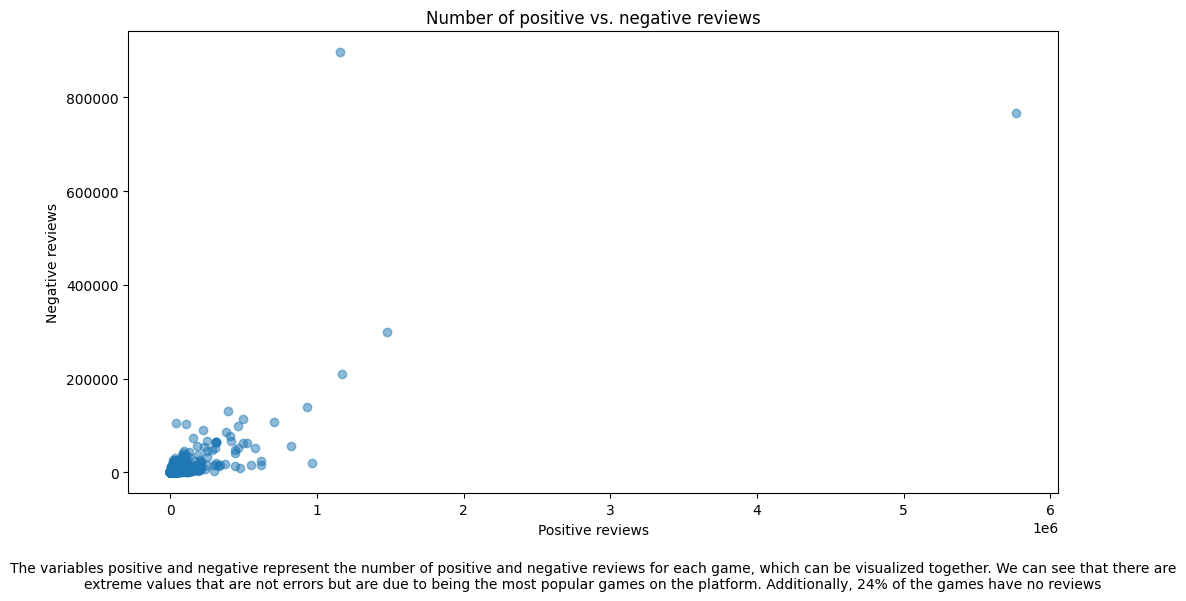

In [37]:
# Reviews
plt.figure(figsize=(12, 6))
plt.scatter(df['Positive'], df['Negative'], alpha=0.5)
plt.title('Number of positive vs. negative reviews')
plt.xlabel('Positive reviews')
plt.ylabel('Negative reviews')
caption = "The variables positive and negative represent the number of positive and negative reviews for each game, which can be visualized together. We can see that there are extreme values that are not errors but are due to being the most popular games on the platform. Additionally, 24% of the games have no reviews"
plt.text(0.5, -0.2, caption, ha='center', fontsize=10, wrap=True, transform=plt.gca().transAxes)
plt.show()

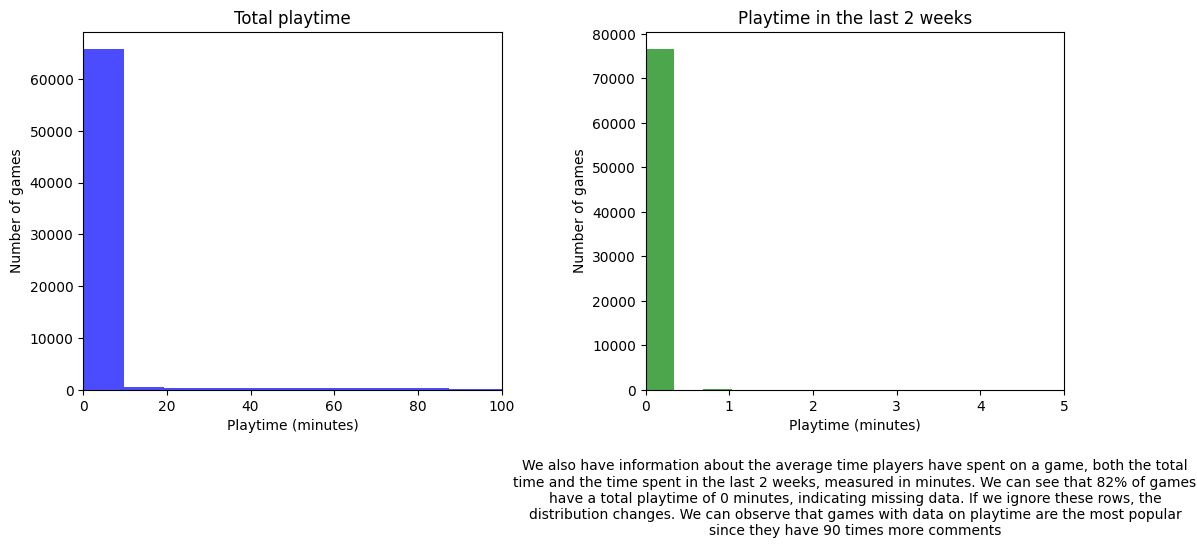

In [39]:
# Average playtime
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Average playtime forever'], bins=15000, color='blue', alpha=0.7)
plt.title('Total playtime')
plt.xlabel('Playtime (minutes)')
plt.ylabel('Number of games')
plt.xlim(0, 100)
plt.subplot(1, 2, 2)
plt.hist(df['Average playtime two weeks'], bins=32000, color='green', alpha=0.7)
plt.title('Playtime in the last 2 weeks')
plt.xlabel('Playtime (minutes)')
plt.ylabel('Number of games')
caption = "We can see that 82% of games have a total playtime of 0 minutes, indicating missing data."
plt.text(0.5, -0.4, caption, ha='center', fontsize=10, wrap=True, transform=plt.gca().transAxes)
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

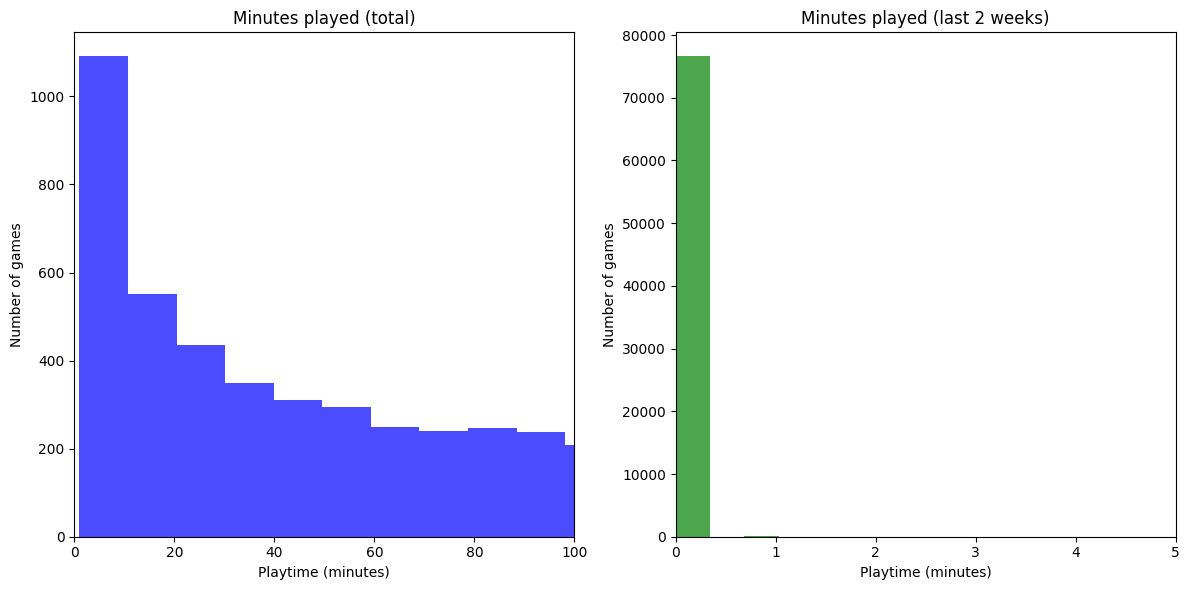

In [40]:
# Average playtime (excluding 0)
filtered_df = df[df['Average playtime forever'] != 0]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(filtered_df['Average playtime forever'], bins=15000, color='blue', alpha=0.7)
plt.title('Minutes played (total)')
plt.xlabel('Playtime (minutes)')
plt.ylabel('Number of games')
plt.xlim(0, 100)
plt.subplot(1, 2, 2)
plt.hist(df['Average playtime two weeks'], bins=32000, color='green', alpha=0.7)
plt.title('Minutes played (last 2 weeks)')
plt.xlabel('Playtime (minutes)')
plt.ylabel('Number of games')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()